In [1]:
#Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import yfinance as yf 
import statsmodels.api as sm
import statsmodels as sms

%matplotlib inline

In [2]:
#Import $AMC price data from yfinance and save it as a variable, import data back to July 2020

amc = yf.download('AMC', "2020-07-01", "2021-06-25", parse_dates=True, index_col='date')
amc

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-07-01,4.260000,4.600000,4.260000,4.570000,4.570000,4914500
2020-07-02,4.690000,4.690000,4.470000,4.530000,4.530000,3908400
2020-07-06,4.620000,4.640000,4.130000,4.280000,4.280000,5489700
2020-07-07,4.180000,4.290000,4.080000,4.130000,4.130000,2667600
2020-07-08,4.490000,4.520000,4.200000,4.430000,4.430000,5586800
...,...,...,...,...,...,...
2021-06-18,61.259998,64.959999,56.849998,59.259998,59.259998,242896900
2021-06-21,61.340000,63.009998,53.430000,55.689999,55.689999,185876100
2021-06-22,54.099998,58.740002,51.049999,58.270000,58.270000,169494100


<AxesSubplot:xlabel='Date'>

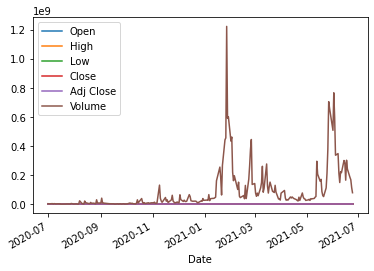

In [3]:
#Plot the adjusted close of AMC

amc.plot()

In [4]:
#Import TrendReq from pytrends to pull google trends data. If you don't have pytrends downloaded -- pip install pytrends

from pytrends.request import TrendReq
pytrends = TrendReq()

In [5]:
#Import AMC interest overtime from google trends using pytrends

kw_list = ['AMC']

pytrends.build_payload(kw_list, timeframe='today 12-m')
pytrends

In [6]:
#Use the .interest_over_time() function to extract the google trends data as a dataframe. Save to a variable 
amc_gt = pytrends.interest_over_time()
amc_gt['AMC'] = pytrends.interest_over_time()
amc_gt.drop(columns='isPartial')

,AMC
date,
2020-07-05,5
2020-07-12,5
2020-07-19,6
2020-07-26,5
2020-08-02,5
2020-08-09,9
2020-08-16,11
2020-08-23,9
2020-08-30,9


Text(0.5, 1.0, 'AMC Adj Close & Google Trends Interest Overtime')

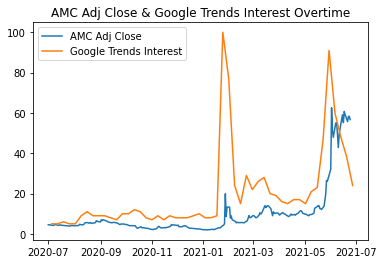

In [7]:
#Plot the AMC adjusted price along with the google trends interest overtime 

plt.plot(amc['Adj Close'], label = 'AMC Adj Close')
plt.plot(amc_gt['AMC'], label = 'Google Trends Interest')
plt.legend(loc='upper left')
plt.title('AMC Adj Close & Google Trends Interest Overtime')